In [1]:
import pandas as pd

df=pd.read_csv('grades_km_input.csv')
df.describe()

,Student,English,Math,Science
count,620.000000,620.000000,620.000000,620.000000
mean,310.475806,84.303226,77.877419,79.404839
std,179.082001,11.577860,12.310908,12.536047
min,1.000000,56.000000,55.000000,55.000000
25%,155.750000,78.000000,69.000000,70.000000
50%,310.500000,85.000000,78.000000,80.000000
75%,465.250000,95.000000,85.250000,90.000000
max,619.000000,100.000000,100.000000,100.000000


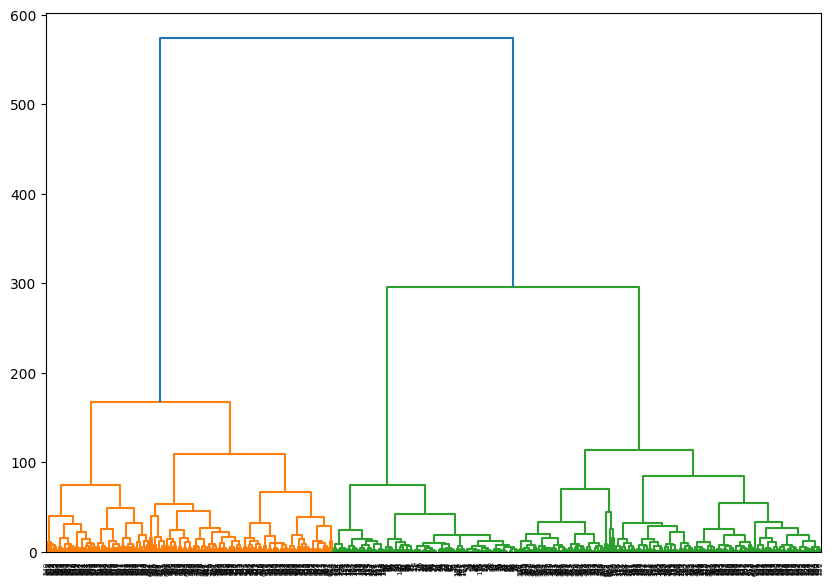

In [6]:
from scipy.cluster.hierarchy import dendrogram,linkage

import matplotlib.pyplot as plt

data=df[['English','Math','Science']]

link=linkage(data,method='ward')

plt.figure(figsize=(10,7))

dend = dendrogram(link)

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

range_n_clusters=[2,3,4,5,6]

for n_cluster in range_n_clusters:
    model=AgglomerativeClustering(n_clusters=n_cluster)
    model.fit(X=data)
    silhouette_AVG=silhouette_score(data,model.labels_)
    print('For n_clusters =',n_cluster,'The average silhouette_score is :',round(silhouette_AVG,2),
    )

For n_clusters = 2 The average silhouette_score is : 0.51
For n_clusters = 3 The average silhouette_score is : 0.48
For n_clusters = 4 The average silhouette_score is : 0.44
For n_clusters = 5 The average silhouette_score is : 0.38
For n_clusters = 6 The average silhouette_score is : 0.37


In [8]:
model=AgglomerativeClustering(2)
model.fit(data)
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

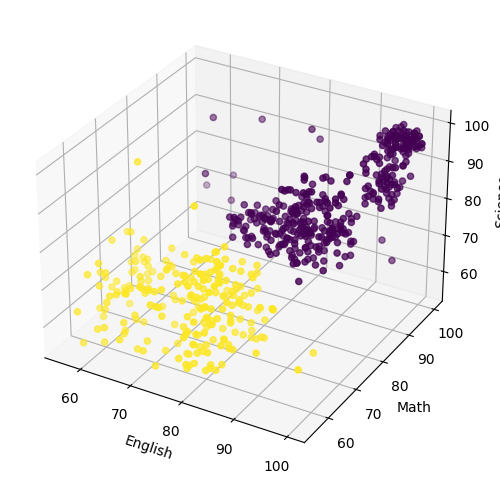

In [18]:
fig=plt.figure(figsize=(26,6))

ax=fig.add_subplot(1,3,1,projection='3d')

ax.scatter(data['English'],data['Math'],data['Science'],c=model.labels_)

ax.set_xlabel('English')
ax.set_ylabel('Math')
ax.set_zlabel('Science')

plt.show()